In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Кластеризация

In [4]:
### Генерим датасет

from sklearn.datasets import make_circles

dataset = make_circles(n_samples=1000,
                       noise=0.1,
                       factor=0.4,
                       random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))),
                       columns=["x1", "x2", "y"])

dataset.head()

,x1,x2,y
0,0.441882,0.020749,1.0
1,0.004388,-0.252644,1.0
2,-0.786777,-0.757186,0.0
3,0.161325,0.254744,1.0
4,-0.275482,0.316769,1.0


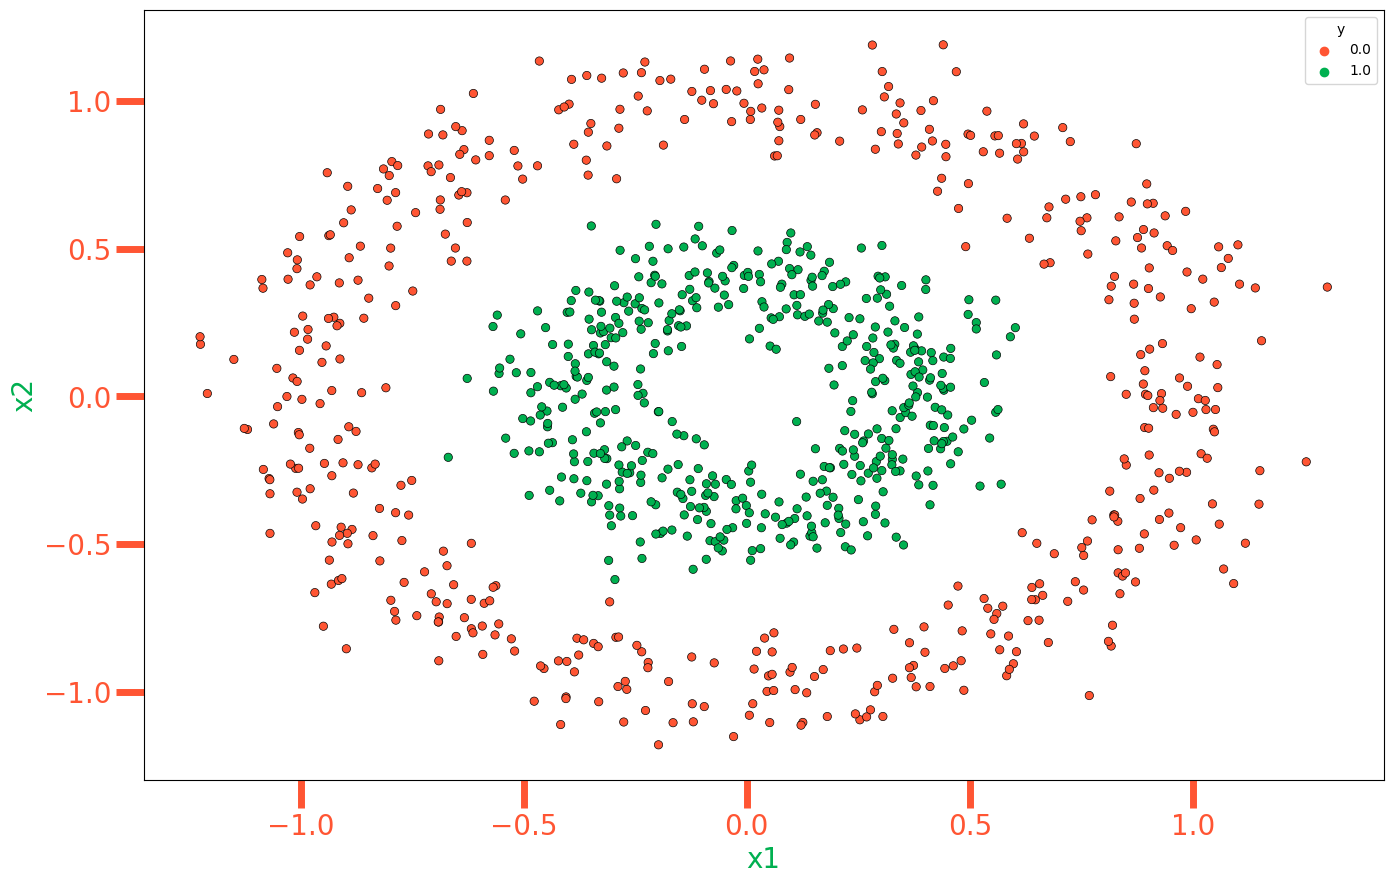

In [5]:
### Изобразим объекты и раскрасим их в классы

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.scatterplot(x="x1",
                y="x2",
                hue="y",
                edgecolor="k",
                palette=["#FF5533", "#00B050"],
                data=dataset)

plt.show()

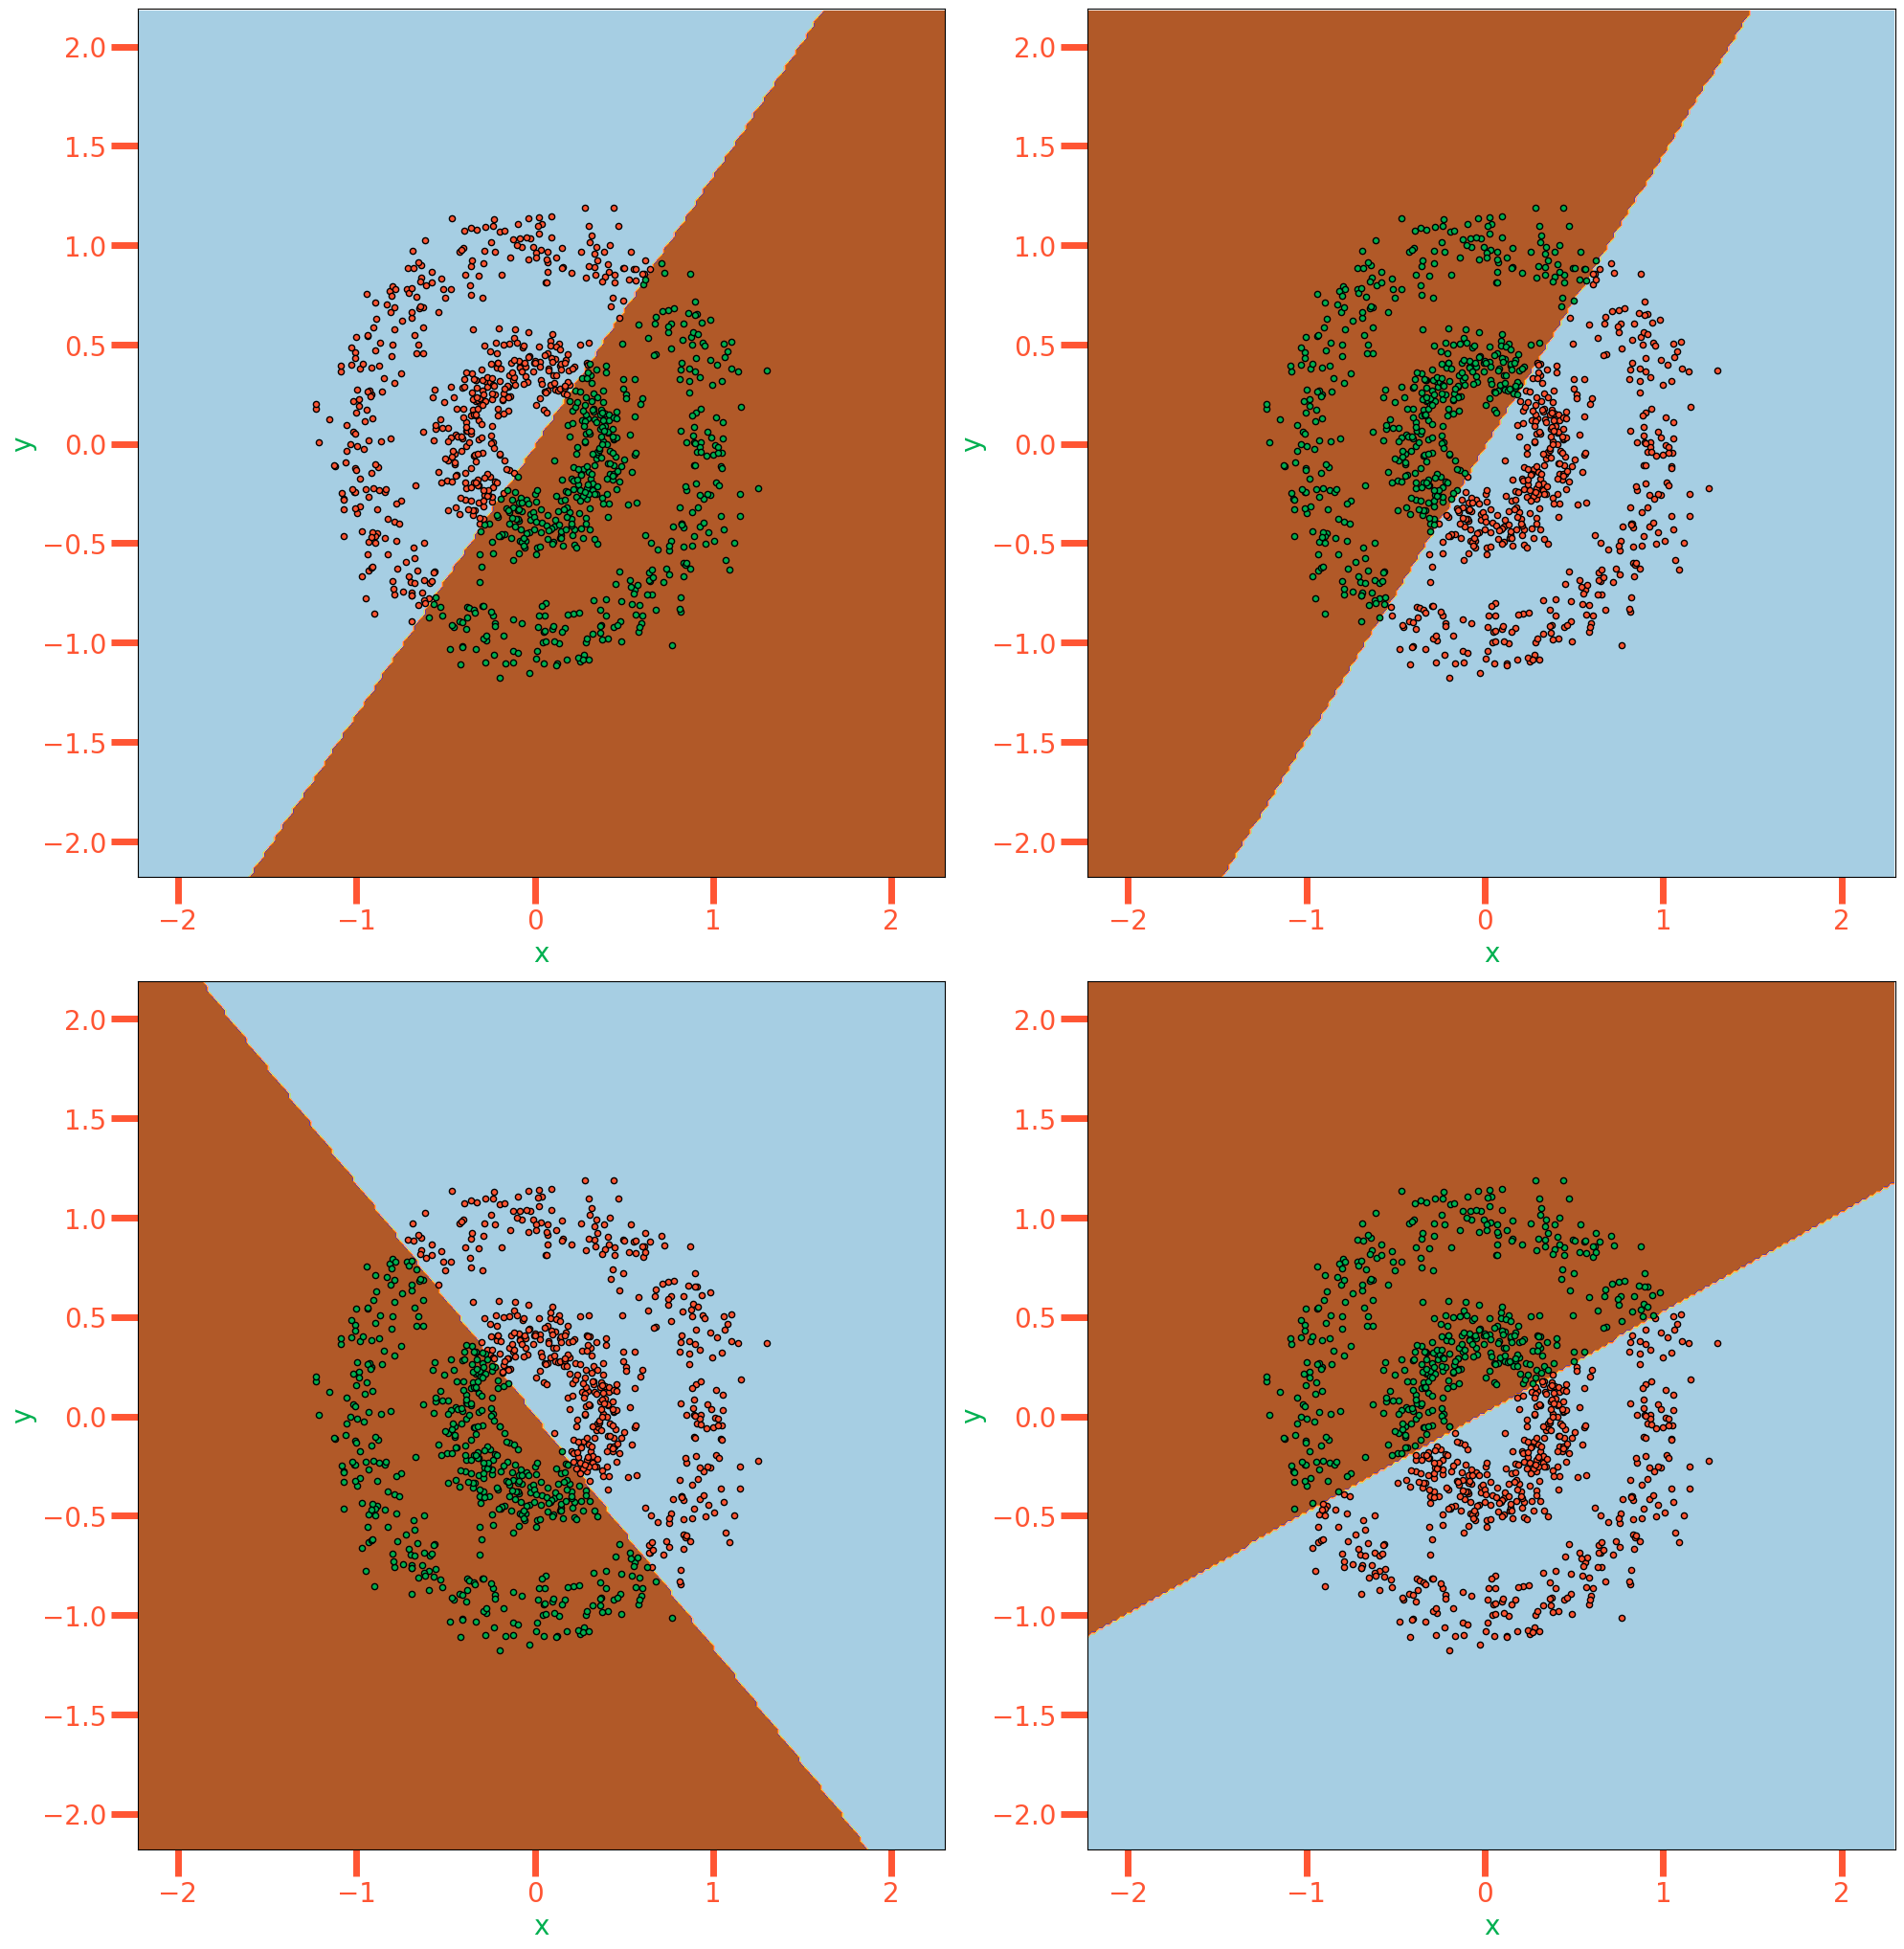

In [6]:
### Применим к объектам K-means 
### с 2 кластерами и разными точками инициализации!

inits = ['random',
         'k-means++',
         np.array([[1, 1],
          [0, 0]]),
         np.array([[1, -2],
          [1, -2]])
        ]

from sklearn.cluster import KMeans

fig = plt.figure()
fig.set_size_inches(20, 50)

for i, s in enumerate(inits):
    
    X = dataset[["x1", "x2"]]
    
    kmeans = KMeans(n_clusters=2, init=s, random_state=0).fit(X)
    ax_ = fig.add_subplot(5, 2, i+1)
    
    pixel_step = 0.02
    x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
    
    ### Генерим много-много точек на плоскости

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )
    
    ### Для каждой точки даем прогноз, чтобы покрыть поверхности

    Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    ### Заполняем пространство

    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    ### Рисуем точечки и обученные области

    y = kmeans.predict(X)
    
    for i, c in zip(range(2), ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel("x")
    plt.ylabel("y")
    
fig.tight_layout()
plt.show()

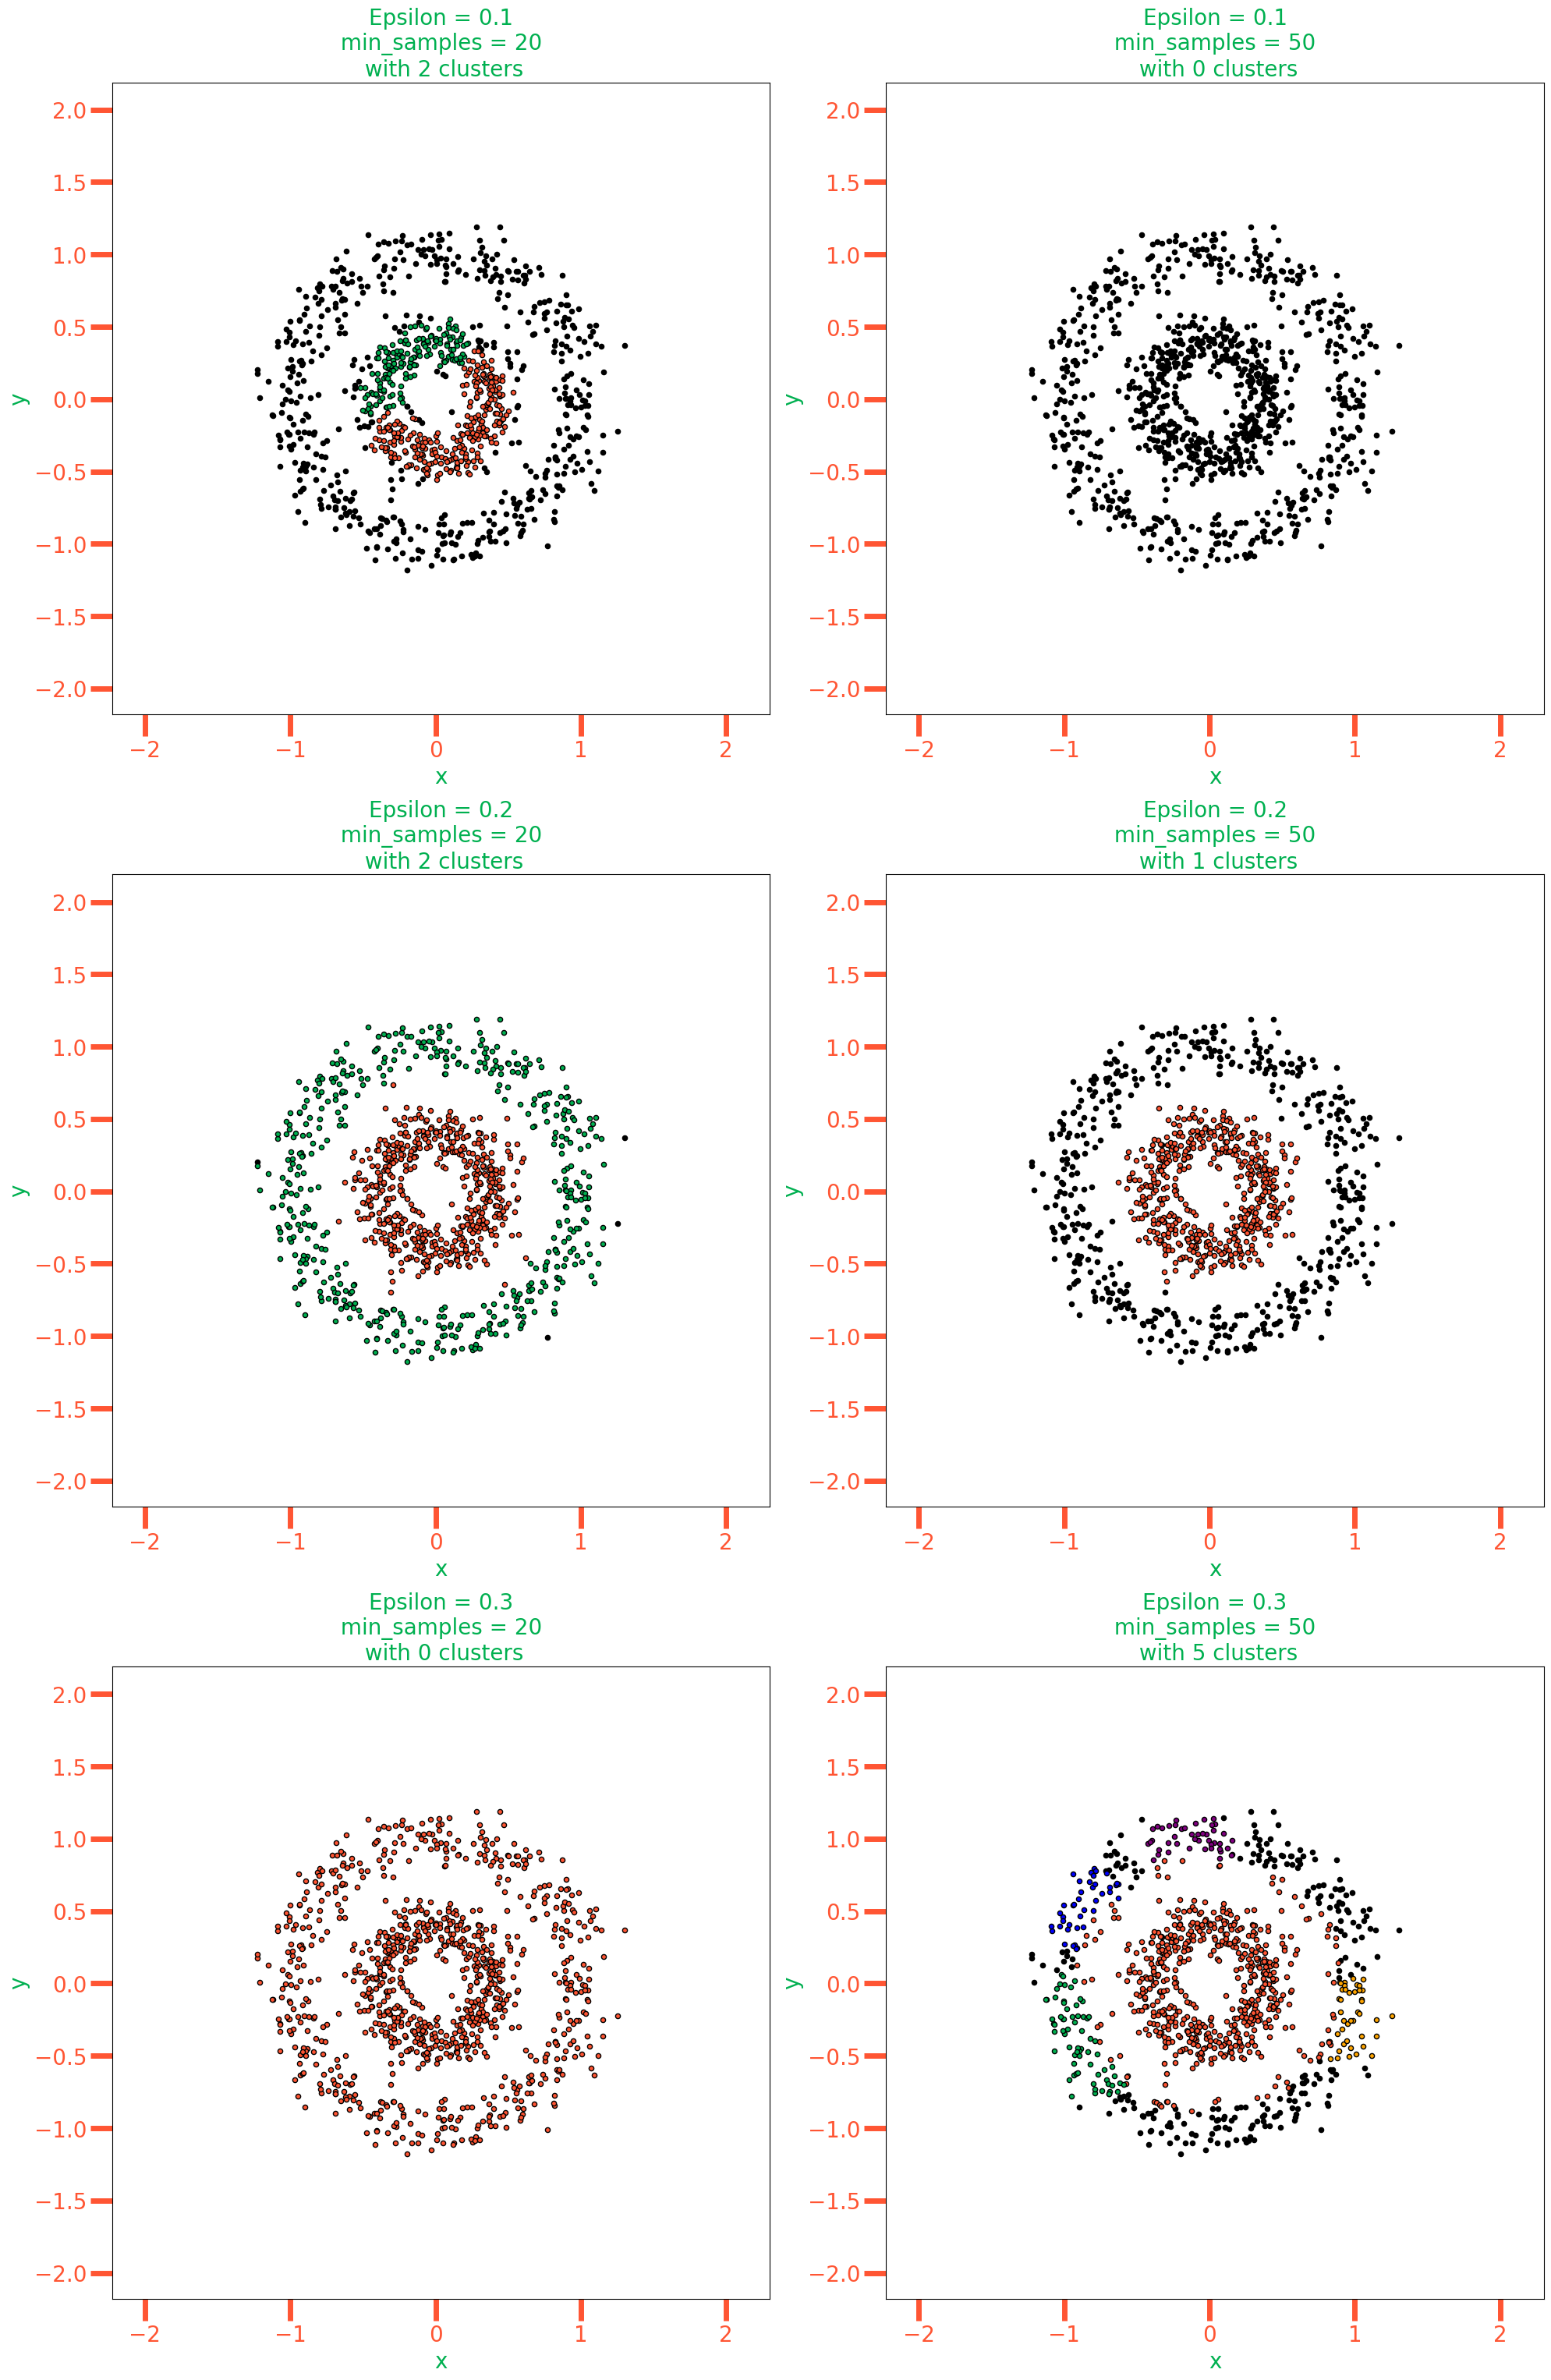

In [7]:
### Применим к объектам DBSDCAN 
### с разными наборами пар гиперпараметров
### отвечающих за количество соседей у ядровых точек
### и за размер окрестности для проверки

pairs_of_hyperparams = [
                            [0.1,20],
                            [0.1,50],
                            [0.2,20],
                            [0.2,50],
                            [0.3,20],
                            [0.3,50],
                       ]

from sklearn.cluster import DBSCAN

fig = plt.figure()
fig.set_size_inches(20, 50)

for i, s in enumerate(pairs_of_hyperparams):
    
    X = dataset[["x1", "x2"]]
    
    dbscan = DBSCAN(eps=s[0], min_samples=s[1]).fit(X)
    ax_ = fig.add_subplot(5, 2, i+1)
    
    colors = ["black", "#FF5533",
              "#00B050", "orange",
              "blue", "purple"]
    
    y = dbscan.labels_
    labels = sorted(list(set(dbscan.labels_)))
    
    if len(labels)==1 and y[0]==0:
        colors = {0:"#FF5533"}
    else:
        colors = dict(zip(labels, colors))

    
    for i, c in zip(labels, colors.values()):
        
        idx = np.where(y == i)
        
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel("x")
    plt.ylabel("y")
    
    if len(y)==1 and y[0]==0:
        n_clusters = 1
    else:
        n_clusters = len(set(y))-1
    
    plt.title(f"Epsilon = {s[0]}\n min_samples = {s[1]} \n with {n_clusters} clusters")
    
fig.tight_layout()
plt.show()

### Сегментация клиентов

In [8]:
df = pd.read_excel('processed_segmentation.xlsx')


df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'processed_segmentation.xlsx'

In [ ]:
### Здесь данные центрировать необходимости нет

X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

In [ ]:
### Произведем T-SNE преобразование

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

array([[-87.569435 , -15.26503  ],
       [ -8.729778 ,  57.128128 ],
       [ 94.75875  , -13.49711  ],
       ...,
       [ -3.3942163,   5.1693273],
       [-29.317492 , -27.538656 ],
       [  6.6004043,  46.878845 ]], dtype=float32)

In [ ]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

<AxesSubplot:xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

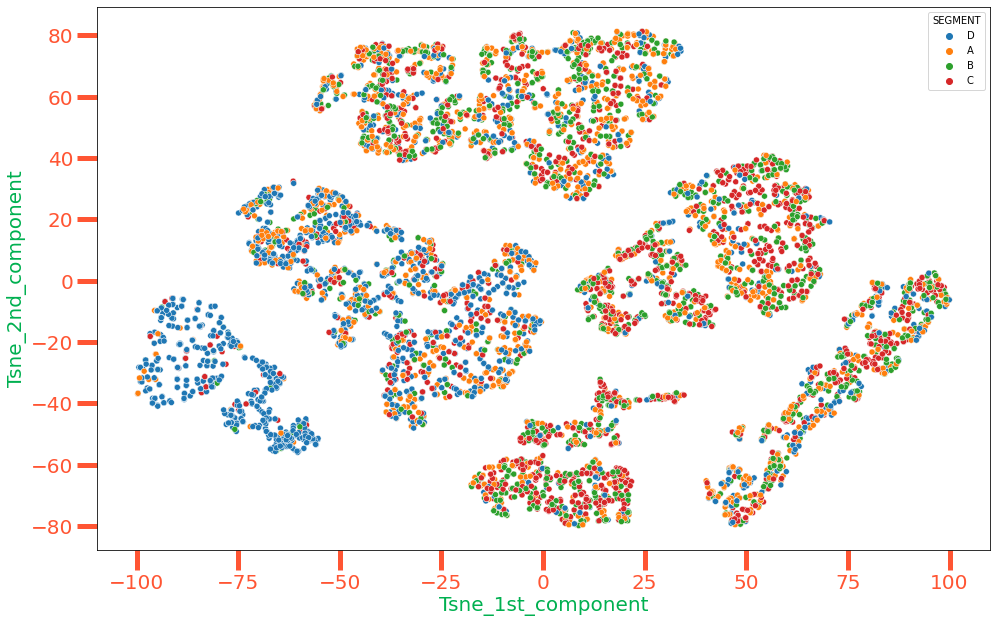

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

In [ ]:
### Просегментируем клиентов, используя K-Means с 4 кластерами:

kmeans_semg = KMeans(n_clusters=4).fit(X_scaled)
k_means_labels = kmeans_semg.predict(X_scaled)

X_tsne_with_kmeans_preds = pd.concat(
    (
        X_tsne, pd.DataFrame({"KMEANS label":k_means_labels})
    ),
    axis=1
)

X_tsne_with_kmeans_preds.head()

,Tsne_1st_component,Tsne_2nd_component,SEGMENT,KMEANS label
0,-87.569435,-15.26503,D,0
1,-8.729778,57.128128,A,1
2,94.758751,-13.49711,B,2
3,88.015495,-9.39479,B,3
4,-1.161169,65.574783,A,3


Сравним долю совпадения ответов K-Means кластеризации с истинными сегментами

In [ ]:
import itertools

accuracies = {}

for perm in itertools.permutations(X_tsne['SEGMENT'].unique()):
    
    vv = dict(zip(perm, [0, 1, 2, 3]))
    
    mapping = X_tsne_with_kmeans_preds['SEGMENT'].map(vv)
    acc = (mapping == X_tsne_with_kmeans_preds['KMEANS label']).mean()
    
    accuracies[perm] = acc
    
print(f"{max(accuracies.values())} for {max(accuracies, key=accuracies.get)} combination")

0.45525532969757065 for ('D', 'B', 'A', 'C') combination


In [ ]:
real_cluster_names = dict(zip([0, 1, 2, 3], max(accuracies, key=accuracies.get)))
real_cluster_names

{0: 'D', 1: 'B', 2: 'A', 3: 'C'}

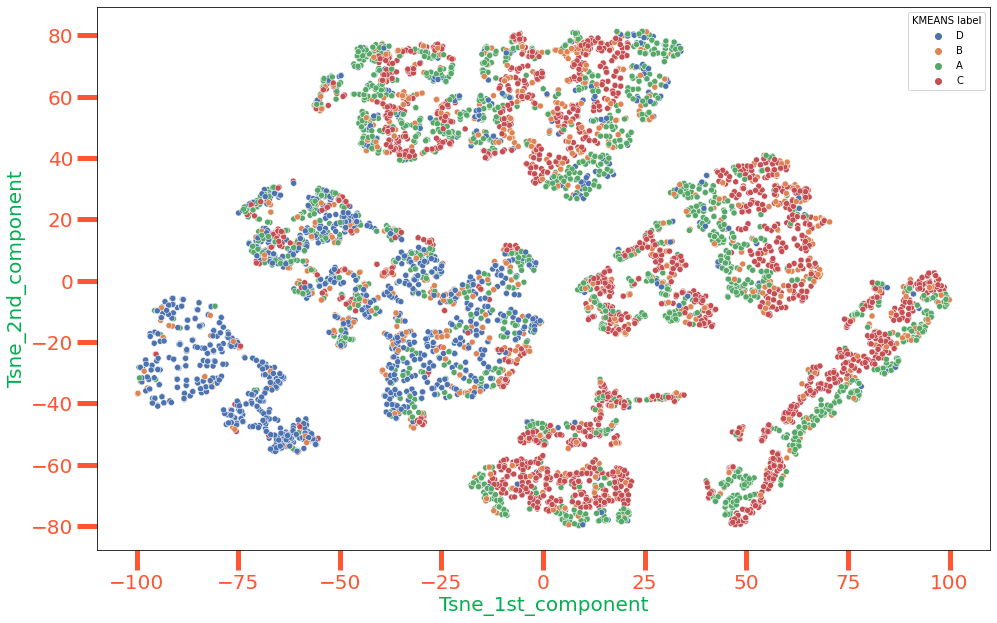

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)

X_inv = X_tsne_with_kmeans_preds.copy()
X_inv["KMEANS label"] = X_inv["KMEANS label"].map(real_cluster_names)

sns.scatterplot(data=X_inv, 
                x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="KMEANS label",
                palette="deep")

plt.show()